<a href="https://colab.research.google.com/github/DeboraOliver/MachineLearning_lessons/blob/main/MLS_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN)

In [ ]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Carregando o arquivo de dados

dados = pd.read_csv('knn.csv')


In [ ]:
# Imprimindo o conjunto de dados

dados

,x,y,c
0,1,1,A
1,2,2,A
2,4,3,B
3,3,3,A
4,3,5,B
5,5,6,B
6,5,4,B


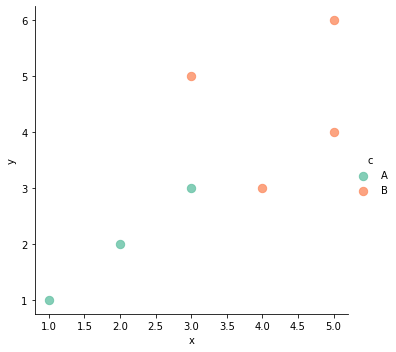

In [ ]:
# Visualizando o conjunto de dados

sns.lmplot('x', 'y', data = dados, hue = 'c', palette = 'Set2', fit_reg = False, scatter_kws = {'s': 70})

plt.show()


In [ ]:
# Definindo a variável de entrada X

X = dados[['x', 'y']]

X

,x,y
0,1,1
1,2,2
2,4,3
3,3,3
4,3,5
5,5,6
6,5,4


In [ ]:
# Definindo a variável de saída y

y = dados[['c']]

y

,c
0,A
1,A
2,B
3,A
4,B
5,B
6,B


In [ ]:
# Definindo o classificador baseado em KNN

vizinhos = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
# Realizando treinamento (Encontra os vizinhos mais próximos para todos os pontos do conjunto de dados)

vizinhos.fit(X, y)

KNeighborsClassifier()

In [ ]:
# Realizando predição (vizinhos mais próximos) para um ponto de teste

print(vizinhos.predict([[3.0, 3.9]]))

['B']


# Naive Bayes

In [ ]:
# Importando bibliotecas

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Carregando o arquivo de dados

df = pd.read_csv("weather_dataset.csv")

df

,Outlook,Temperature,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [ ]:
# Definindo as variáveis de entrada e saída

target = df['Play']

inputs = df.drop('Play', axis = 'columns')

In [ ]:
# Visualizando as variáveis de entrada

inputs


,Outlook,Temperature,Humidity,Windy
0,Rainy,Hot,High,f
1,Rainy,Hot,High,t
2,Overcast,Hot,High,f
3,Sunny,Mild,High,f
4,Sunny,Cool,Normal,f
5,Sunny,Cool,Normal,t
6,Overcast,Cool,Normal,t
7,Rainy,Mild,High,f
8,Rainy,Cool,Normal,f
9,Sunny,Mild,Normal,f


In [ ]:
# Visualizando a variável de saída

target


0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [ ]:
# Definindo variável de Encoding (strings para numérico)

label_encoder = LabelEncoder()

In [ ]:
# Criando as colunas numéricas correspondentes

inputs['Outlook_numerical'] = label_encoder.fit_transform(inputs['Outlook'])

inputs['Temp_numerical'] = label_encoder.fit_transform(inputs['Temperature'])

inputs['Hum_numerical'] = label_encoder.fit_transform(inputs['Humidity'])

inputs['Win_numerical'] = label_encoder.fit_transform(inputs['Windy'])

inputs


,Outlook,Temperature,Humidity,Windy,Outlook_numerical,Temp_numerical,Hum_numerical,Win_numerical
0,Rainy,Hot,High,f,1,1,0,0
1,Rainy,Hot,High,t,1,1,0,1
2,Overcast,Hot,High,f,0,1,0,0
3,Sunny,Mild,High,f,2,2,0,0
4,Sunny,Cool,Normal,f,2,0,1,0
5,Sunny,Cool,Normal,t,2,0,1,1
6,Overcast,Cool,Normal,t,0,0,1,1
7,Rainy,Mild,High,f,1,2,0,0
8,Rainy,Cool,Normal,f,1,0,1,0
9,Sunny,Mild,Normal,f,2,2,1,0


In [ ]:
# Descartando as colunas originais do dataframe (não-numéricas)

inputs_numerical = inputs.drop(['Outlook', 'Temperature', 'Humidity', 'Windy'], axis = 'columns')

inputs_numerical


,Outlook_numerical,Temp_numerical,Hum_numerical,Win_numerical
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [ ]:
# Definindo o classificador Gaussian Naive Bayes

classifier = GaussianNB()

In [ ]:
# Treinando o classificador Gaussian Naive Bayes

classifier.fit(inputs_numerical, target)

GaussianNB()

In [ ]:
# Calculando o score do classificador

classifier.score(inputs_numerical, target)

0.8571428571428571

In [ ]:
# Realizando predição em um dado novo
# Outlook: Overcast, Temperature: Cool, Humidity: High, Windy: t

classifier.predict([[0, 0, 0, 1]])


array(['yes'], dtype='<U3')